In [1]:
import pandas as pd
file_path = "data/MPDataset_MPDS2024a.csv"
df = pd.read_csv(file_path)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_45997/53203908.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
# Display the first few rows of the DataFrame
df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.00,1.8,22.800,10.6,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,NaN,80,...,NaN,NaN,NaN,23.81,0.0,19.048,0.0,4.762,2024a,U4SCRD


#### Crear campo 'agno' para registrar el año del programa de gobierno

In [3]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
print(unique_agno_values)

[1944 1948 1952 1956 1958 1960 1964 1968 1970 1973 1976 1979 1982 1985
 1988 1991 1994 1998 2002 2006 2010 2014 2018 2022 1945 1949 1953 1957
 1961 1965 1969 1977 1981 1989 1993 1997 2001 2005 2009 2013 2017 1947
 1950 1966 1971 1975 1984 1987 1990 2007 2011 2015 2019 1951 1954 1962
 1972 1983 1995 1999 2003 1946 1959 1963 1967 1974 1978 2016 2021 1986
 2012 2004 1992 1996 2008 2000 1980 1955 1921 1925 1929 1933 1938 2020
 1920 1924 1928 1932 1936 1940 2023]


In [4]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive,NaN,NaN,NaN
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative,NaN,NaN,NaN
2,Domain_1,External Relations,per103,Anti-Imperialism,NaN,NaN,NaN
3,Domain_1,External Relations,per104,Military: Positive,NaN,NaN,NaN
4,Domain_1,External Relations,per105,Military: Negative,NaN,NaN,NaN


#### Filtramos registros de Chile, separamos por año de elección y calculamos valores representativos basados en el promedio ponderado por el % obtenido en la elección presidencial

In [5]:
import numpy as np
# Create a list with the column names of the 'df' dataframe that begin with 'per'
per_columns_main = [col for col in df.columns if col.startswith('per') and len(col) == 6 and col[3:6].isdigit()]

# Filter df by 'countryname' == 'Chile'
df_Chile = df[df['countryname'] == 'Chile']

# Sort by column 'agno' in ascending order
df_Chile = df_Chile.sort_values(by='agno')

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_main' using column 'presvote' as weights
df_Chile_grouped = df_Chile.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['presvote']) for col in per_columns_main})
).reset_index()

# Rename the columns to include 'agno'
df_Chile_grouped.columns = ['agno'] + per_columns_main

# Store the results in a new DataFrame named 'df_Chile'
df_Chile = df_Chile_grouped

In [6]:
df_Chile

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1989,0.367161,0.049098,0.204681,2.241851,0.898452,0.567973,4.764237,0.913344,0.420679,...,1.052644,1.254295,0.477772,0.000000,5.484998,0.000000,1.538705,0.661133,0.156720,2.772946
1,1993,0.289693,0.037331,0.000000,1.127951,0.206192,0.209040,3.254579,0.721319,0.037331,...,3.430532,2.003640,0.102744,0.000000,2.483834,0.000000,2.902561,0.146474,0.274453,4.335008
2,1999,0.056430,0.126620,0.000000,2.584547,0.393984,0.112347,1.348291,0.351827,0.000000,...,4.412448,1.588358,1.602694,0.000000,2.809479,0.000000,2.163017,0.912975,0.449626,3.315535
3,2005,0.501296,0.000000,0.108972,1.237788,0.586723,0.361019,2.251643,0.646983,0.425330,...,4.117068,2.018262,1.731747,0.000000,1.553891,0.000000,0.783858,0.000000,0.515604,3.377599
4,2009,0.005651,0.000000,0.174377,0.897141,0.376400,0.029600,1.546047,0.789124,0.050161,...,3.451155,0.631070,2.968290,0.000000,3.070458,0.000000,2.101008,0.089001,0.997248,1.111063
5,2013,0.207215,0.000000,0.000000,0.966870,0.330345,0.055490,0.421749,1.206564,0.022495,...,5.563425,0.389431,2.638940,0.000000,3.606727,0.183468,1.865988,0.035991,0.000000,1.451426
6,2017,0.120377,0.007759,0.032650,0.457728,0.192404,0.146080,0.654128,0.359964,0.101033,...,6.083596,4.538058,1.873421,0.084356,3.954357,0.082254,0.878473,0.438021,1.065976,3.083463
7,2021,0.038239,0.015586,0.059179,0.688266,0.217654,0.086899,0.766963,0.170824,0.320040,...,4.817641,1.188001,1.300909,0.069930,3.131964,0.028412,1.705175,0.076174,0.138109,0.281693


#### Inclusión y Minorías
#### 503, 705

In [11]:
# Create dataframe 'df_inclymin' from 'df_Chile' with columns 'agno', 'per503', 'per705'
df_inclymin = df_Chile[['agno', 'per503', 'per705']]
df_inclymin['Total'] = df_inclymin['per503'] + df_inclymin['per705']
# Display 'df_inclymin'
df_inclymin

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_45997/2120796550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inclymin['Total'] = df_inclymin['per503'] + df_inclymin['per705']


,agno,per503,per705,Total
0,1989,8.360642,0.156720,8.517362
1,1993,7.311582,0.274453,7.586035
2,1999,8.361796,0.449626,8.811422
3,2005,8.789974,0.515604,9.305577
4,2009,7.296178,0.997248,8.293426
5,2013,7.260687,0.000000,7.260687
6,2017,5.341153,1.065976,6.407129
7,2021,6.918945,0.138109,7.057054


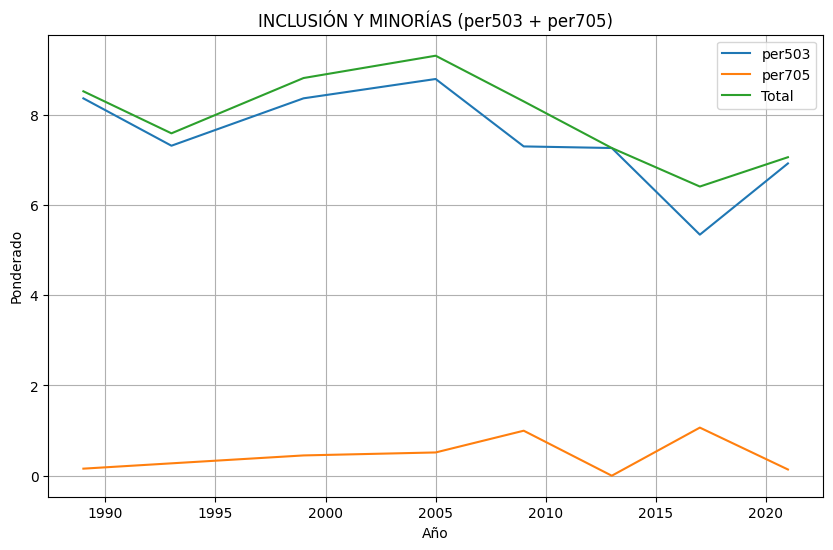

In [17]:
import matplotlib.pyplot as plt

# Plot columns per503, per705, Total with agno in the horizontal axis
plt.figure(figsize=(10, 6))
plt.plot(df_inclymin['agno'], df_inclymin['per503'], label='per503')
plt.plot(df_inclymin['agno'], df_inclymin['per705'], label='per705')
plt.plot(df_inclymin['agno'], df_inclymin['Total'], label='Total')

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title('INCLUSIÓN Y MINORÍAS (per503 + per705)')
plt.legend()
plt.grid(True)
plt.show()